In [1]:
# Import the pathlib and csv library
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv
import random
import numpy as np
from MCForecastFantasy import MCSimulation

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\zacha\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#os.getcwd()

In [3]:
#Setting the different CSV paths
data_2015_path = Path("./Resources/Historic_Data/fanduel_salary_production/NFL-HistoricalProduction_2015.csv")
data_2016_path = Path("./Resources/Historic_Data/fanduel_salary_production/NFL-HistoricalProduction_2016.csv")
data_2017_path = Path("./Resources/Historic_Data/fanduel_salary_production/NFL-HistoricalProduction_2017.csv")
data_2018_path = Path("./Resources/Historic_Data/fanduel_salary_production/NFL-HistoricalProduction_2018.csv")
data_2019_path = Path("./Resources/Historic_Data/fanduel_salary_production/NFL-HistoricalProduction_2019.csv")
data_2020_path = Path("./Resources/Historic_Data/fanduel_salary_production/NFL-HistoricalProduction_2020.csv")

In [4]:
#Reading in the CSV into into seperate dataframes
df_1 = pd.read_csv(data_2015_path)
df_2 = pd.read_csv(data_2016_path)
df_3 = pd.read_csv(data_2017_path)
df_4 = pd.read_csv(data_2018_path)
df_5 = pd.read_csv(data_2019_path)
df_6 = pd.read_csv(data_2020_path)

In [5]:
#Appending a column "Year" for each dataframe
df_1['Year'] = 2015

df_2['Year'] = 2016

df_3['Year'] = 2017

df_4['Year'] = 2018

df_5['Year'] = 2019

df_6['Year'] = 2020


In [6]:
#Concating all dataframes into one 
combined_df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6], axis='rows', join='inner')
combined_df.reset_index(inplace=True)


In [7]:
#Drop Columns
combined_df.drop(['DKSal','DK Points','index'], axis = 1, inplace=True)
#combined_df
combined_df['Year/Week'] = combined_df['Year']+combined_df['Week']/100
combined_df.round(decimals = 2)
combined_df['Year/Week'] = combined_df['Year/Week'].apply(str)

#sort dataframe by player and year/week
combined_df_2 = combined_df.sort_values(by=['Player', 'Year/Week'])

combined_df_2.rename(columns={'FD Points': "Points","FDSal": "Salary"},inplace= True)

#check for null values
combined_df_2.isnull().sum()

P                    0
Player               0
Week                 0
Team                 0
Opp                  0
Opp Position Rank    0
Salary               0
Points               0
Year                 0
Year/Week            0
dtype: int64

In [9]:

combined_df_2.dtypes

P                     object
Player                object
Week                   int64
Team                  object
Opp                   object
Opp Position Rank      int64
Salary                 int64
Points               float64
Year                   int64
Year/Week             object
dtype: object

In [32]:
#combined_df.dtypes

P                     object
Player                object
Week                   int64
Team                  object
Opp                   object
Opp Position Rank      int64
FDSal                  int64
FD Points            float64
Year                   int64
dtype: object

In [10]:


combined_df_2

P         Player  Week Team  Opp  Opp Position Rank  Salary  Points  \
36606  WR     A.J. Brown     1  TEN  CLE                 11    5100    11.5   
38173  WR     A.J. Brown     2  TEN  IND                 16    5400     4.0   
39545  WR     A.J. Brown     3  TEN  JAX                 21    5200     0.9   
35564  WR     A.J. Brown     4  TEN  ATL                 12    4700    22.9   
38256  WR     A.J. Brown     5  TEN  BUF                  3    5600     3.7   
38390  WR     A.J. Brown     6  TEN  DEN                  4    5400     3.3   
36985  WR     A.J. Brown     7  TEN  LAC                  6    5300     9.2   
37182  WR     A.J. Brown     8  TEN   TB                 30    5500     8.1   
36846  WR     A.J. Brown     9  TEN  CAR                 14    5500    10.1   
38839  WR     A.J. Brown    10  TEN   KC                  8    5500     2.2   
35641  WR     A.J. Brown    12  TEN  JAX                 12    5300    21.5   
37658  WR     A.J. Brown    13  TEN  IND                 19    5300     6.0   
35360  WR     A.J. Brown    14  TEN  OAK                 22    5400    31.1   
35644  WR     A.J. Brown    15  TEN  HOU                 19    6200    21.4   
36175  WR     A.J. Brown    16  TEN   NO                 27    7200    14.8   
35703  WR     A.J. Brown    17  TEN  HOU                 21    7200    20.4   
45208  WR     A.J. Brown     1  TEN  DEN                  9    6700     6.4   
46835  WR     A.J. Brown     2  TEN  JAX                 10    6600     0.0   
47034  WR     A.J. Brown     3  TEN  MIN                 31    6500     0.0   
44291  WR     A.J. Brown     5  TEN  BUF                 19    6500    17.7   
44192  WR     A.J. Brown     6  TEN  HOU                 18    6500    20.1   
44076  WR     A.J. Brown     7  TEN  PIT                 26    6800    24.3   
44773  WR     A.J. Brown     8  TEN  CIN                 18    7500    10.4   
44279  WR     A.J. Brown     9  TEN  CHI                  3    7600    18.1   
46082  RB    A.J. Dillon     1   GB  MIN                 14    4700     1.4   
45991  RB    A.J. Dillon     2   GB  DET                  6    4500     1.7   
47129  RB    A.J. Dillon     3   GB   NO                 13    4500     0.0   
46392  RB    A.J. Dillon     4   GB  ATL                 13    4500     0.3   
45700  RB    A.J. Dillon     6   GB   TB                  8    4500     3.1   
46186  RB    A.J. Dillon     7   GB  HOU                 32    4500     1.1   
...    ..            ...   ...  ...  ...                ...     ...     ...   
41556  WR      Zay Jones     5  BUF  TEN                  7    4500     0.0   
42911  WR      Zay Jones     7  OAK   GB                 15    4500     0.0   
38260  WR      Zay Jones     8  OAK  HOU                 29    4500     3.7   
38194  WR      Zay Jones     9  OAK  DET                 21    4800     3.9   
39158  WR      Zay Jones    10  OAK  LAC                  8    4800     1.5   
38187  WR      Zay Jones    11  OAK  CIN                 15    4800     4.0   
39168  WR      Zay Jones    12  OAK  NYJ                 30    4800     1.5   
38755  WR      Zay Jones    13  OAK   KC                  7    4700     2.4   
39497  WR      Zay Jones    14  OAK  TEN                 17    4700     1.0   
39500  WR      Zay Jones    15  OAK  JAX                 14    4700     1.0   
38561  WR      Zay Jones    16  OAK  LAC                  3    4600     2.9   
38473  WR      Zay Jones    17  OAK  DEN                  7    4700     3.1   
46515  WR      Zay Jones     1   LV  CAR                 19    4800     0.0   
45011  WR      Zay Jones     2   LV   NO                 19    4500     8.0   
45450  WR      Zay Jones     3   LV   NE                 29    4500     4.7   
45382  WR      Zay Jones     4   LV  BUF                 22    4500     5.2   
46317  WR      Zay Jones     5   LV   KC                  1    4500     0.7   
47962  WR      Zay Jones     7   LV   TB                  5    4500     0.0   
48136  WR      Zay Jones     8   LV  CLE                 3

In [16]:
#Create Function which allows you to easily filter the dataframe
"""
Arguments:
    df : pandas.Dataframe
        the main data frame you pass to the filter function
    players: list (optional)
        a list of player names
    year: list (optional)
        a list of years for which you want data
    position: list (optional)
        a list of positions for which you want data
    team: list (optional)
        a list of teams for which you want data
    not_points: list (optional)
        a list of point values you want to exclude (ex. may want to exclude zero point games)

"""
    



def choose_roster(df, players=[], year=[], position=[],team=[], not_points=[]):
    #filter based on player name
    if len(players)>0:    
        df=df[df['Player'].isin(players)]
    
    #filter based on year
    if len(year)>0:
        df=df[df['Year'].isin(year)]
     
    #filter based on position
    if len(position)>0:
        df=df[df['P'].isin(position)]
    
    #filter based on team
    if len(team)>0:
        df=df[df['Team'].isin(team)]
    
    #remove entries with certain point values    
    if len(not_points)>0:
        df=df[~df['Points'].isin(not_points)] 
        
    return df


In [21]:
#combined_df_2[combined_df_2["Team"]].distinct

In [22]:
choose_roster(combined_df_2, team=['JAX','NO'],position=["WR","QB","RB"],year=["2020"])

P            Player  Week Team  Opp  Opp Position Rank  Salary  \
44157  RB      Alvin Kamara     1   NO   TB                  2    8300   
43979  RB      Alvin Kamara     2   NO   LV                 26    8500   
43961  RB      Alvin Kamara     3   NO   GB                 23    8600   
44213  RB      Alvin Kamara     4   NO  DET                 27    8800   
44380  RB      Alvin Kamara     5   NO  LAC                  5    8900   
44246  RB      Alvin Kamara     7   NO  CAR                 27    9300   
44168  RB      Alvin Kamara     8   NO  CHI                 14    9000   
44528  RB      Alvin Kamara     9   NO   TB                  8    9000   
47349  WR       Austin Carr     5   NO  LAC                 14    4500   
46188  WR       Austin Carr     7   NO  CAR                  2    4500   
46064  WR       Austin Carr     8   NO  CHI                  3    4500   
46606  WR     Bennie Fowler     1   NO   TB                 32    4700   
46907  WR     Bennie Fowler     2   NO   LV                 27    4500   
47132  WR     Bennie Fowler     3   NO   GB                 27    4500   
47469  WR     Bennie Fowler     4   NO  DET                 24    4500   
45908  WR     Bennie Fowler     5   NO  LAC                 14    4500   
46168  WR      Chris Conley     1  JAX  IND                 26    5100   
45150  WR      Chris Conley     2  JAX  TEN                  4    4900   
45414  WR      Chris Conley     3  JAX  MIA                 30    5100   
45289  WR      Chris Conley     4  JAX  CIN                  3    4900   
45154  WR      Chris Conley     5  JAX  HOU                 14    4800   
46184  WR      Chris Conley     6  JAX  DET                 25    5200   
44869  WR      Chris Conley     7  JAX  LAC                 12    4900   
44924  WR      Chris Conley     9  JAX  HOU                 26    4600   
46013  RB    Chris Thompson     1  JAX  IND                  6    4900   
44791  RB    Chris Thompson     2  JAX  TEN                 15    4700   
45225  RB    Chris Thompson     3  JAX  MIA                  9    5300   
47434  RB    Chris Thompson     4  JAX  CIN                 28    5000   
45318  RB    Chris Thompson     5  JAX  HOU                 31    4700   
45739  RB    Chris Thompson     6  JAX  DET                 32    4600   
...    ..               ...   ...  ...  ...                ...     ...   
46508  RB  Ryquell Armstead     1  JAX  IND                  6    4800   
46753  RB  Ryquell Armstead     2  JAX  TEN                 15    4600   
46919  RB  Ryquell Armstead     3  JAX  MIA                  9    4600   
47438  RB  Ryquell Armstead     4  JAX  CIN                 28    4600   
47219  RB  Ryquell Armstead     5  JAX  HOU                 31    4500   
47673  RB  Ryquell Armstead     6  JAX  DET                 32    4500   
47987  RB  Ryquell Armstead     7  JAX  LAC                  7    4500   
48361  RB  Ryquell Armstead     9  JAX  HOU                 30    4500   
45444  QB       Taysom Hill     1   NO   TB                 23    5000   
46275  QB       Taysom Hill     2   NO   LV                 18    5000   
48492  QB       Taysom Hill     3   NO   GB                 16    5000   
45958  QB       Taysom Hill     4   NO  DET                 24    5000   
45094  QB       Taysom Hill     5   NO  LAC                 30    4800   
46339  QB       Taysom Hill     7   NO  CAR                  4    4800   
44523  QB       Taysom Hill     8   NO  CHI                  2    4700   
44811  QB       Taysom Hill     9   NO   TB                  2    4500   
47674  WR      Terry Godwin     6  JAX  DET                 25    4500   
46234  WR    Tommylee Lewis     8   NO  CHI                  3    4500   
46252  WR    Tre'Quan Smith     1   NO   TB                 32    4900   
44713  WR    Tre'Quan Smith     2   NO   LV                 27    5000   
45231  WR    Tre'Quan Smith     3   NO   GB                 27    5400   
44214  WR    Tre'Quan Smith     4   NO  DET                 24    5300   
45981  WR   

In [11]:
#Visualization of Player Production Per Week
combined_df_2.hvplot.scatter(x='Year/Week',y="Points",ylabel='Points',groupby='Player', rot=90)


:DynamicMap   [Player]
   :Scatter   [Year/Week]   (Points)

In [68]:
player_1=choose_roster(combined_df_2, ['Drew Brees'])
player_1

P      Player  Week Team  Opp  Opp Position Rank  Salary  Points  \
614    QB  Drew Brees     1   NO  ARI                  0    8900   17.50   
1108   QB  Drew Brees     2   NO   TB                 30    8900   13.10   
6224   QB  Drew Brees     3   NO  CAR                  8    8400    0.00   
287    QB  Drew Brees     4   NO  DAL                  6    8400   22.36   
732    QB  Drew Brees     5   NO  PHI                 16    8100   16.30   
696    QB  Drew Brees     6   NO  ATL                  8    8300   16.68   
1143   QB  Drew Brees     7   NO  IND                 24    8400   12.80   
0      QB  Drew Brees     8   NO  NYG                 10    7900   46.30   
40     QB  Drew Brees     9   NO  TEN                 13    8500   32.38   
950    QB  Drew Brees    10   NO  WAS                 13    8600   14.36   
1930   QB  Drew Brees    12   NO  HOU                 16    8200    8.12   
235    QB  Drew Brees    13   NO  CAR                  3    7700   23.48   
383    QB  Drew Brees    14   NO   TB                 16    7900   20.48   
132    QB  Drew Brees    15   NO  DET                 18    8000   26.74   
105    QB  Drew Brees    16   NO  JAX                 27    8200   28.18   
712    QB  Drew Brees    17   NO  ATL                  9    8400   16.42   
8208   QB  Drew Brees     1   NO  OAK                 21    8700   31.42   
9040   QB  Drew Brees     2   NO  NYG                  7    9200   14.52   
8294   QB  Drew Brees     3   NO  ATL                 31    9000   26.94   
9132   QB  Drew Brees     4   NO   SD                 27    8600   13.88   
8190   QB  Drew Brees     6   NO  CAR                 23    8500   33.60   
8329   QB  Drew Brees     7   NO   KC                  8    8500   25.68   
8537   QB  Drew Brees     8   NO  SEA                  6    8000   20.70   
8353   QB  Drew Brees     9   NO   SF                 21    8600   24.72   
8417   QB  Drew Brees    10   NO  DEN                  1    8200   23.02   
8857   QB  Drew Brees    11   NO  CAR                 26    8300   16.40   
8198   QB  Drew Brees    12   NO   LA                  7    8600   32.50   
9744   QB  Drew Brees    13   NO  DET                 28    9300   10.04   
10285  QB  Drew Brees    14   NO   TB                 20    8700    7.48   
8237   QB  Drew Brees    15   NO  ARI                  4    8200   29.36   
...    ..         ...   ...  ...  ...                ...     ...     ...   
27724  QB  Drew Brees    12   NO  ATL                 30    9000   21.44   
29229  QB  Drew Brees    13   NO  DAL                 11    9000    8.28   
28236  QB  Drew Brees    14   NO   TB                 30    8500   14.94   
29511  QB  Drew Brees    15   NO  CAR                 27    8400    6.92   
28030  QB  Drew Brees    16   NO  PIT                 22    8400   16.94   
34695  QB  Drew Brees    17   NO  CAR                 23    8100    0.00   
35618  QB  Drew Brees     1   NO  HOU                 14    8000   21.80   
39735  QB  Drew Brees     2   NO  LAR                  1    8000    0.52   
41232  QB  Drew Brees     3   NO  SEA                 20    7700    0.00   
41495  QB  Drew Brees     4   NO  DAL                  9    6000    0.00   
41619  QB  Drew Brees     5   NO   TB                 22    6000    0.00   
41839  QB  Drew Brees     6   NO  JAX                 19    6000    0.00   
42966  QB  Drew Brees     7   NO  CHI                  5    6800    0.00   
35455  QB  Drew Brees     8   NO  ARI                 29    7200   25.92   
36607  QB  Drew Brees    10   NO  ATL                 31    8300   11.48   
35667  QB  Drew Brees    11   NO   TB                 31    8300   21.12   
35544  QB  Drew Brees    12   NO  CAR                 12    8500   23.44   
36650  QB  Drew Brees    13   NO  ATL                 27    8500   11.26   
35299  QB  Drew Brees    14   NO   SF                  2    7700   40.06   
35404  QB  Drew Brees    15   NO  IND                 19    8200   28.28   
35568  QB  Drew Brees    16   NO  TEN                 14

In [70]:
player1=choose_roster(combined_df_2,['Drew Brees'],year=[2018,2019],not_points=[0])
player1

P      Player  Week Team  Opp  Opp Position Rank  Salary  Points  \
27394  QB  Drew Brees     1   NO   TB                 19    8400   31.56   
27965  QB  Drew Brees     2   NO  CLE                  9    8800   17.62   
27340  QB  Drew Brees     3   NO  ATL                 13    8500   40.54   
29175  QB  Drew Brees     4   NO  NYG                 18    8700    8.58   
27471  QB  Drew Brees     5   NO  WAS                  1    8600   27.22   
28042  QB  Drew Brees     7   NO  BAL                  2    8600   16.78   
29334  QB  Drew Brees     8   NO  MIN                 24    8600    7.80   
27395  QB  Drew Brees     9   NO  LAR                  3    8400   31.44   
27438  QB  Drew Brees    10   NO  CIN                 29    8400   28.90   
27407  QB  Drew Brees    11   NO  PHI                 24    8500   30.52   
27724  QB  Drew Brees    12   NO  ATL                 30    9000   21.44   
29229  QB  Drew Brees    13   NO  DAL                 11    9000    8.28   
28236  QB  Drew Brees    14   NO   TB                 30    8500   14.94   
29511  QB  Drew Brees    15   NO  CAR                 27    8400    6.92   
28030  QB  Drew Brees    16   NO  PIT                 22    8400   16.94   
35618  QB  Drew Brees     1   NO  HOU                 14    8000   21.80   
39735  QB  Drew Brees     2   NO  LAR                  1    8000    0.52   
35455  QB  Drew Brees     8   NO  ARI                 29    7200   25.92   
36607  QB  Drew Brees    10   NO  ATL                 31    8300   11.48   
35667  QB  Drew Brees    11   NO   TB                 31    8300   21.12   
35544  QB  Drew Brees    12   NO  CAR                 12    8500   23.44   
36650  QB  Drew Brees    13   NO  ATL                 27    8500   11.26   
35299  QB  Drew Brees    14   NO   SF                  2    7700   40.06   
35404  QB  Drew Brees    15   NO  IND                 19    8200   28.28   
35568  QB  Drew Brees    16   NO  TEN                 14    8200   22.86   
35607  QB  Drew Brees    17   NO  CAR                 11    8400   22.02   

       Year Year/Week  
27394  2018   2018.01  
27965  2018   2018.02  
27340  2018   2018.03  
29175  2018   2018.04  
27471  2018   2018.05  
28042  2018   2018.07  
29334  2018   2018.08  
27395  2018   2018.09  
27438  2018    2018.1  
27407  2018   2018.11  
27724  2018   2018.12  
29229  2018   2018.13  
28236  2018   2018.14  
29511  2018   2018.15  
28030  2018   2018.16  
35618  2019   2019.01  
39735  2019   2019.02  
35455  2019   2019.08  
36607  2019    2019.1  
35667  2019   2019.11  
35544  2019   2019.12  
36650  2019   2019.13  
35299  2019   2019.14  
35404  2019   2019.15  
35568  2019   2019.16  
35607  2019   2019.17

In [56]:
num_sims=500
games=13

MC_roster=MCSimulation(
    roster=player_1,
    number_simulation=num_sims,
    number_game=games


)

In [57]:
MC_roster.calc_points()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0           1           2           3           4           5    \
0    18.410056   23.390093   15.530929   21.080574    8.068323   38.299856   
1    35.985900   56.229642   21.575362   48.978287   18.802114   59.612373   
2    52.487000   88.722966   52.937771   86.885272   54.547863   86.428342   
3    64.141156  111.395393   77.116187  119.073791   70.029704  100.782411   
4   103.509251  114.586730   94.729106  133.855971   80.566975  117.191005   
5   124.285635  126.670338   95.236689  149.785838  115.933763  136.559088   
6   159.097082  147.774095  109.054507  166.936940  128.681293  153.622616   
7   178.893685  164.408205  132.811361  171.838637  158.860612  171.712909   
8   200.985964  196.360670  144.425089  196.494023  185.098669  199.337035   
9   208.838916  217.966170  161.333146  224.112117  188.103425  227.471219   
10  215.211239  242.338715  174.061162  246.636388  180.847107  247.677757   
11  233.267709  270.826787  194.683305  256.406845  192.581781  269.585959   
12  256.400814  300.063099  211.223831  276.940163  221.631547  270.201682   

           6           7           8           9    ...         490  \
0    20.243222   16.676062   14.896783   24.150354  ...   36.483584   
1    29.733021   39.943936   19.889918   47.147256  ...   50.994682   
2    45.514015   66.849493   50.834362   61.657489  ...   65.451220   
3    64.207908  105.118925   71.387186   72.251734  ...   82.160399   
4    78.643933  145.195169   81.428389   78.621543  ...   99.641421   
5    93.459187  157.026231   95.620977   70.749290  ...  109.018017   
6   123.500455  182.336860  114.905968   91.975819  ...  129.553150   
7   138.435261  205.202320  116.484135  110.124804  ...  142.543858   
8   167.945884  221.342001  135.744221  126.908850  ...  141.800660   
9   182.402983  243.561202  154.425462  137.219318  ...  167.730459   
10  189.038576  264.391164  182.811715  155.842680  ...  174.980980   
11  216.553260  298.176430  195.466208  193.418727  ...  186.403481   
12  242.604238  316.518630  208.930176  221.459370  ...  195.023153   

           491         492         493         494         495         496  \
0    16.123125   24.014560   23.285866    6.705941   23.559244   16.585942   
1    31.399779   39.926268   32.986611   29.174372   47.441116   53.243230   
2    65.544273   48.482430   55.621718   61.027663   62.190700   76.039347   
3    83.178224   54.542296   77.849882   81.117631   98.613040  104.685598   
4   101.484459   79.817986   91.349328   96.917994  121.505497  131.819135   
5   117.134095   87.439560  105.437329  130.150609  162.218364  145.020061   
6   154.543150  106.460044  102.874060  147.204681  181.541206  160.165509   
7   188.462701  120.446569  136.841803  173.348822  195.531451  170.048903   
8   206.940176  136.722920  162.391208  195.763621  217.379924  167.111704   
9   208.740396  146.242514  190.489240  201.361358  243.054515  182.562005   
10  215.736935  153.801230  184.714741  203.129563  262.068123  207.304399   
11  219.405172  173.451837  220.819805  207.221531  298.108658  232.569252   
12  225.391477  195.421302  226.625231  222.008955  318.785459  260.847327   

           497         498         499  
0    26.151678   13.437540   26.137566  
1    45.354161   26.095579   35.412287  
2    73.131476   40.693476   35.505874  
3    77.623318   63.206562   65.955119  
4    88.585864   83.476631   79.733122  
5    99.364333  102.566143  106.304859  
6   119.547821  107.566760  141.065328  
7   153.227534  124.121793  159.370166  
8   158.469906  145.571720  184.461056  
9   199.290222  146.328248  195.762079  
10  225.334458  152.269739  213.467095  
11  259.046818  174.100798  222.673330  
12  267.312412  198.530055  265.225789  

[13 rows x 500 columns]

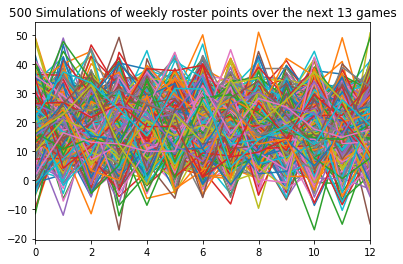

In [58]:
MC_roster.plot_weekly_simulation()

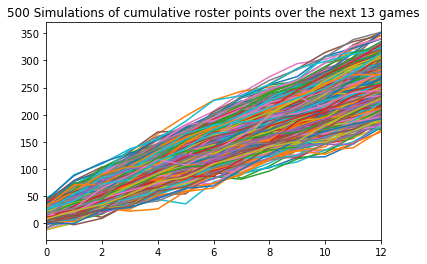

In [19]:
MC_roster.plot_szn_simulation()

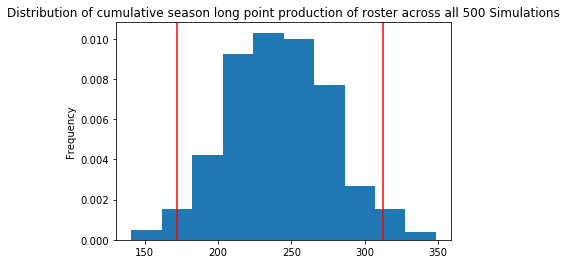

In [59]:
MC_roster.plot_szn_distribution()

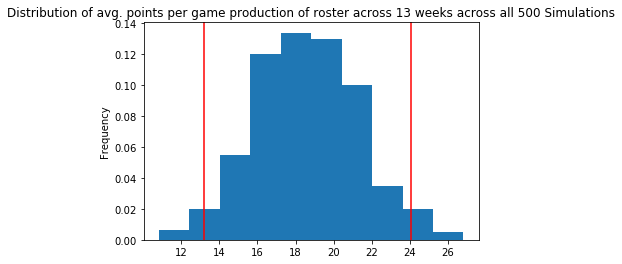

In [60]:
MC_roster.plot_avg_szn_distribution()

In [61]:
MC_roster.summarize_szn_points()

count           500.000000
mean            241.922887
std              35.475470
min             140.825243
25%             218.112571
50%             240.704733
75%             266.506611
max             348.589625
95% CI Lower    171.651023
95% CI Upper    312.713837
Name: 12, dtype: float64

In [62]:
MC_roster.summarize_avg_szn_points()

count           500.000000
mean             18.609453
std               2.728882
min              10.832711
25%              16.777890
50%              18.515749
75%              20.500509
max              26.814587
95% CI Lower     13.203925
95% CI Upper     24.054911
Name: 12, dtype: float64